In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LFS_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148804 entries, 0 to 148803
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      148804 non-null  int64  
 1   reg       148804 non-null  int64  
 2   reg_name  148804 non-null  object 
 3   cwt       148804 non-null  int64  
 4   cwt_name  148804 non-null  object 
 5   gpp       148804 non-null  int64  
 6   members   148804 non-null  int64  
 7   sex       148804 non-null  int64  
 8   age       148804 non-null  int64  
 9   marital   148804 non-null  int64  
 10  edu       148804 non-null  int64  
 11  occup     148804 non-null  int64  
 12  status    148804 non-null  int64  
 13  work_hr   148804 non-null  int64  
 14  weight    148804 non-null  float64
 15  salary    148804 non-null  int64  
dtypes: float64(1), int64(13), object(2)
memory usage: 18.2+ MB


In [4]:
convert_dict = {'year':str,
                'reg': str,
                'cwt': str,
                'sex': str,
                'marital': str,
                'occup': str,
                'status': str,
               }
df = df.astype(convert_dict)
print(df.dtypes)

year         object
reg          object
reg_name     object
cwt          object
cwt_name     object
gpp           int64
members       int64
sex          object
age           int64
marital      object
edu           int64
occup        object
status       object
work_hr       int64
weight      float64
salary        int64
dtype: object


In [5]:
df = df.drop(columns=['reg', 'cwt','cwt_name'])

In [6]:
df

,year,reg_name,gpp,members,sex,age,marital,edu,occup,status,work_hr,weight,salary
0,2013,Central,60502,1,1,59,2,12,12,5,35,85.4958,99970
1,2013,Central,226173,5,1,52,2,3,54,6,70,423.2613,99000
2,2013,Central,174854,4,1,55,2,16,21,5,35,480.9394,98000
3,2013,Northern,60093,4,1,59,2,18,12,5,24,65.5107,97000
4,2013,Bangkok,481118,3,2,28,2,12,93,6,48,512.5734,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,Southern,55601,5,1,25,2,3,52,6,30,99.8435,2700
148800,2015,Southern,55601,3,1,41,2,3,61,6,24,231.4722,2700
148801,2015,Southern,103220,3,2,26,2,9,72,6,42,87.5258,2650
148802,2015,Northern,82899,1,2,59,3,3,61,6,42,197.9502,2640


In [7]:
df2 = pd.get_dummies(df)
df2

,gpp,members,age,edu,work_hr,weight,salary,year_2013,year_2014,year_2015,...,occup_81,occup_83,occup_91,occup_92,occup_93,occup_96,status_4,status_5,status_6,status_7
0,60502,1,59,12,35,85.4958,99970,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,226173,5,52,3,70,423.2613,99000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,174854,4,55,16,35,480.9394,98000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60093,4,59,18,24,65.5107,97000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,481118,3,28,12,48,512.5734,96000,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,55601,5,25,3,30,99.8435,2700,0,0,1,...,0,0,0,0,0,0,0,0,1,0
148800,55601,3,41,3,24,231.4722,2700,0,0,1,...,0,0,0,0,0,0,0,0,1,0
148801,103220,3,26,9,42,87.5258,2650,0,0,1,...,0,0,0,0,0,0,0,0,1,0
148802,82899,1,59,3,42,197.9502,2640,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# base line: 2014,ภาคกลาง,เพศชาย,โสด,พนงออฟฟิศ เสมียน,ลูกจ้างรัฐบาล
df3 = df2.drop(columns=['year_2014', 'reg_name_Central','sex_1', 'marital_1', 'occup_41', 'status_4'])
df3

,gpp,members,age,edu,work_hr,weight,salary,year_2013,year_2015,reg_name_Bangkok,...,occup_75,occup_81,occup_83,occup_91,occup_92,occup_93,occup_96,status_5,status_6,status_7
0,60502,1,59,12,35,85.4958,99970,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,226173,5,52,3,70,423.2613,99000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,174854,4,55,16,35,480.9394,98000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60093,4,59,18,24,65.5107,97000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,481118,3,28,12,48,512.5734,96000,1,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,55601,5,25,3,30,99.8435,2700,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148800,55601,3,41,3,24,231.4722,2700,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148801,103220,3,26,9,42,87.5258,2650,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148802,82899,1,59,3,42,197.9502,2640,0,1,0,...,0,0,0,0,0,0,0,0,1,0


เงินเดือนเฉลี่ย = 12339 บาทต่อเดือน
เงินเดือนสูงสุด = 99970 บาทต่อเดือน
เงินเดือนต่ำสุด = 2640 บาทต่อเดือน


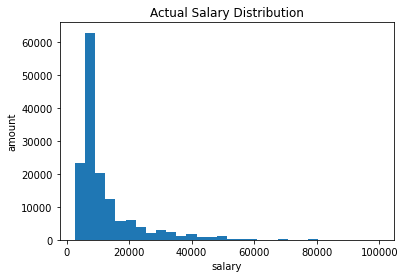

In [9]:
y = df3.loc[:, 'salary']
y
print('เงินเดือนเฉลี่ย =',round(np.mean(y)), 'บาทต่อเดือน')
print('เงินเดือนสูงสุด =',np.max(y), 'บาทต่อเดือน')
print('เงินเดือนต่ำสุด =',np.min(y), 'บาทต่อเดือน')
plt.hist(y, bins=30)
plt.title('Actual Salary Distribution')
plt.xlabel('salary')
plt.ylabel('amount')
plt.show()

gpp เฉลี่ย = 186916.7 บาท
gpp สูงสุด = 1008615 บาท
gpp ต่ำสุด = 43385 บาท


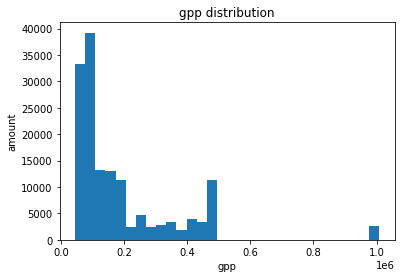

In [10]:
gpp = df.loc[:, 'gpp']

print('gpp เฉลี่ย =',round(np.mean(gpp),1), 'บาท')
print('gpp สูงสุด =',np.max(gpp), 'บาท')
print('gpp ต่ำสุด =',np.min(gpp), 'บาท')
plt.hist(gpp, bins=30)
plt.title('gpp distribution')
plt.xlabel('gpp')
plt.ylabel('amount')
plt.show()

จำนวนสมาชิกเฉลี่ย = 3.4 คน
จำนวนสมาชิกสูงสุด = 12 คน
จำนวนสมาชิกต่ำสุด = 1 คน


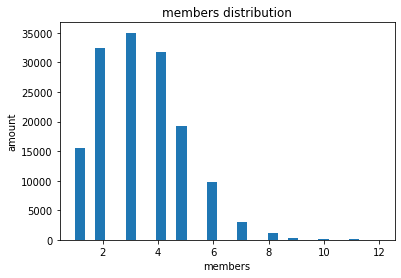

In [11]:
members = df.loc[:, 'members']

print('จำนวนสมาชิกเฉลี่ย =',round(np.mean(members),1), 'คน')
print('จำนวนสมาชิกสูงสุด =',np.max(members), 'คน')
print('จำนวนสมาชิกต่ำสุด =',np.min(members), 'คน')
plt.hist(members, bins=30)
plt.title('members distribution')
plt.xlabel('members')
plt.ylabel('amount')
plt.show()

อายุเฉลี่ย = 39.1 ปี
อายุสูงสุด = 86 ปี
อายุต่ำสุด = 15 ปี


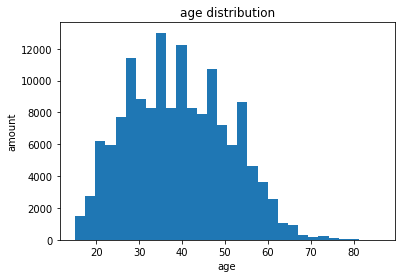

In [12]:
age = df.loc[:, 'age']

print('อายุเฉลี่ย =',round(np.mean(age),1), 'ปี')
print('อายุสูงสุด =',np.max(age), 'ปี')
print('อายุต่ำสุด =',np.min(age), 'ปี')
plt.hist(age, bins=30)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

ปีการศึกษาเฉลี่ย = 9.6 ปี
20
0


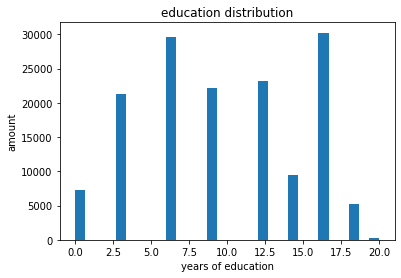

In [13]:
edu = df.loc[:, 'edu']

print('ปีการศึกษาเฉลี่ย =',round(np.mean(edu),1), 'ปี')
print(np.max(edu))
print(np.min(edu))
plt.hist(edu, bins=30)
plt.title('education distribution')
plt.xlabel('years of education')
plt.ylabel('amount')
plt.show()

ชั่วโมงการทำงานเฉลี่ย = 43.208153006639606 ชั่วโมงต่อสัปดาห์
ชั่วโมงการทำงานเฉลี่ย = 8.641630601327922 ชั่วโมงต่อวัน
98
1


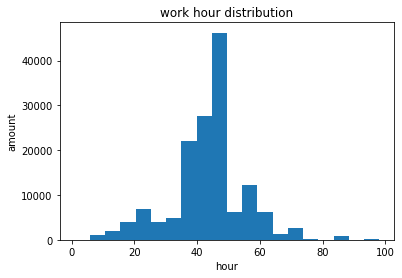

In [14]:
hr = df.loc[:, 'work_hr']

print('ชั่วโมงการทำงานเฉลี่ย =',np.mean(hr), 'ชั่วโมงต่อสัปดาห์')
print('ชั่วโมงการทำงานเฉลี่ย =',np.mean(hr)/5, 'ชั่วโมงต่อวัน')
print(np.max(hr))
print(np.min(hr))
plt.hist(hr, bins=20)
plt.title('work hour distribution')
plt.xlabel('hour')
plt.ylabel('amount')
plt.show()

In [15]:
Weight = df3.loc[:, 'weight']
Weight

0          85.4958
1         423.2613
2         480.9394
3          65.5107
4         512.5734
            ...   
148799     99.8435
148800    231.4722
148801     87.5258
148802    197.9502
148803    313.6017
Name: weight, Length: 148804, dtype: float64

In [16]:
X = df3.drop(['salary','weight'], axis=1)
X

,gpp,members,age,edu,work_hr,year_2013,year_2015,reg_name_Bangkok,reg_name_Northeastern,reg_name_Northern,...,occup_75,occup_81,occup_83,occup_91,occup_92,occup_93,occup_96,status_5,status_6,status_7
0,60502,1,59,12,35,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,226173,5,52,3,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,174854,4,55,16,35,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60093,4,59,18,24,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,481118,3,28,12,48,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,55601,5,25,3,30,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148800,55601,3,41,3,24,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148801,103220,3,26,9,42,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148802,82899,1,59,3,42,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X2 = sm.add_constant(X)
X2

,const,gpp,members,age,edu,work_hr,year_2013,year_2015,reg_name_Bangkok,reg_name_Northeastern,...,occup_75,occup_81,occup_83,occup_91,occup_92,occup_93,occup_96,status_5,status_6,status_7
0,1.0,60502,1,59,12,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,226173,5,52,3,70,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,174854,4,55,16,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,60093,4,59,18,24,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,481118,3,28,12,48,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,1.0,55601,5,25,3,30,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
148800,1.0,55601,3,41,3,24,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
148801,1.0,103220,3,26,9,42,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
148802,1.0,82899,1,59,3,42,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
est = sm.WLS(y, X2, weights = Weight).fit()
est

In [19]:
predictions = est.predict(X2)
predictions

0         40904.539081
1         10192.836469
2         33074.617923
3         43071.221149
4         12350.899934
              ...     
148799     3592.914265
148800     5736.165642
148801     7881.601496
148802     6236.288549
148803     8060.958700
Length: 148804, dtype: float64

In [20]:
print(est.summary())

                            WLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.551
Model:                            WLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4253.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:10:30   Log-Likelihood:            -1.5554e+06
No. Observations:              148804   AIC:                         3.111e+06
Df Residuals:                  148760   BIC:                         3.111e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2314.34

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test ,Weight_train, Weight_test = train_test_split(X, y, Weight, test_size = 0.2, random_state=0)

In [22]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train, sample_weight = Weight_train)

LinearRegression()

In [23]:
# Predicting the Test set results
y_prediction = reg.predict(X_test)
y_prediction

array([ 6773.70967615, 22909.18072899, 13959.06484955, ...,
        4399.90608212,  6176.99376147,  4277.68602113])

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# R2
score = r2_score(y_test,y_prediction)
print('R-Squared Score =',score)
# RMSE
print('Root Mean Squared Error =',np.sqrt(mean_squared_error(y_test,y_prediction)))
# MAPE
print('Mean Absolute Percentage Error =',mean_absolute_percentage_error(y_test,y_prediction))

R-Squared Score = 0.5601999210724753
Root Mean Squared Error = 6732.085648033299
Mean Absolute Percentage Error = 0.4086132014721769


เงินเดือนเฉลี่ย = 12249 บาทต่อเดือน
46854.39089377852
-3847.7409893925787


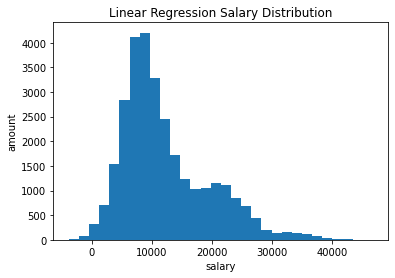

In [25]:
print('เงินเดือนเฉลี่ย =',round(np.mean(y_prediction)), 'บาทต่อเดือน')
print(np.max(y_prediction))
print(np.min(y_prediction))
plt.hist(y_prediction, bins=30)
plt.title('Linear Regression Salary Distribution')
plt.xlabel('salary')
plt.ylabel('amount')
plt.show()

0.539143769115337
5600.6345014457165


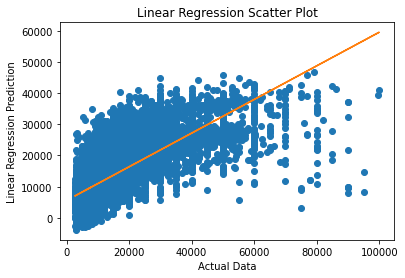

In [26]:
m, b = np.polyfit(y_test, y_prediction, 1)
print(m)
print(b)
plt.plot(y_test, y_prediction, 'o')
plt.plot(y_test, m*y_test + b)
plt.title('Linear Regression Scatter Plot')
plt.xlabel('Actual Data')
plt.ylabel('Linear Regression Prediction')
plt.show()